# ***Import Library***

In [ ]:
!pip install pipreqs

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 8.0 MB/s eta 0:00:00


In [ ]:
!pipreqs "/content/drive/MyDrive/ColabNotebooks/SUBMISSION_NLP_DICODING" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/ColabNotebooks/SUBMISSION_NLP_DICODING/requirements.txt


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import re
import string
import csv
import requests
from io import StringIO

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# ***Loading Data***

In [ ]:
# membuat akses ke google drive untuk load data

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# load data dan simpan sebagai dataframe df

app_reviews_df = pd.read_csv("drive/MyDrive/ColabNotebooks/SUBMISSION_NLP_DICODING/ulasanbcamobile2.csv")

In [ ]:
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,84bef2d7-26c7-4dc0-affe-cb9ccd3290c7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Coba untuk update nya diperbaiki lagi, yang da...",2,38,4.3.2,2024-07-04 01:37:26,"Mohon maaf atas ketidaknyamanan Bapak/Ibu, fit...",2024-07-04 02:41:29,4.3.2
1,fe053dfd-1043-4e64-8312-559427d86364,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah di update lampu indikator merah terus ...,2,27,4.3.3,2024-07-11 02:29:16,Mohon maaf atas ketidaknyamanannya. Apabila la...,2024-07-11 02:40:02,4.3.3
2,ff15204c-8d21-4d40-9c6c-d8b554b0862e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Kenapa bca selalu mempersulit ketika mau memas...,1,18,4.3.3,2024-07-18 03:59:41,Mohon maaf atas kendala yang Bapak/Ibu alami. ...,2024-07-18 04:14:21,4.3.3
3,8072118e-8406-4e04-b367-75aaba3cc960,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ribet banget. Setiap buka aplikasi selalu mint...,1,135,4.3.2,2024-07-03 13:06:23,Mohon maaf atas kendala Bapak/Ibu. Fitur Devic...,2024-07-03 16:28:34,4.3.2
4,2245ece9-da95-4f11-8ce8-b31052db50aa,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Sangat membantu tapi sayang tambah ribet gak k...,3,60,4.3.3,2024-07-05 19:51:43,Mohon maaf atas ketidaknyamanannya. Saran dan ...,2024-07-06 02:20:32,4.3.3


In [ ]:
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
print("Jumlah Ulasan:", jumlah_ulasan)
print("Jumlah Kolom:", jumlah_kolom)

Jumlah Ulasan: 343407
Jumlah Kolom: 11


In [ ]:
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343407 entries, 0 to 343406
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              343407 non-null  object
 1   userName              343407 non-null  object
 2   userImage             343407 non-null  object
 3   content               343280 non-null  object
 4   score                 343407 non-null  int64 
 5   thumbsUpCount         343407 non-null  int64 
 6   reviewCreatedVersion  291416 non-null  object
 7   at                    343407 non-null  object
 8   replyContent          318850 non-null  object
 9   repliedAt             318850 non-null  object
 10  appVersion            291416 non-null  object
dtypes: int64(2), object(9)
memory usage: 28.8+ MB


                      Missing Values Count  Missing Values Percentage
reviewId                                 0                   0.000000
userName                                 0                   0.000000
userImage                                0                   0.000000
content                                127                   0.036982
score                                    0                   0.000000
thumbsUpCount                            0                   0.000000
reviewCreatedVersion                 51991                  15.139761
at                                       0                   0.000000
replyContent                         24557                   7.150990
repliedAt                            24557                   7.150990
appVersion                           51991                  15.139761


<ipython-input-10-52953767d402>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_df.index, y=missing_values_df['Missing Values Percentage'], ax=ax, palette='viridis')


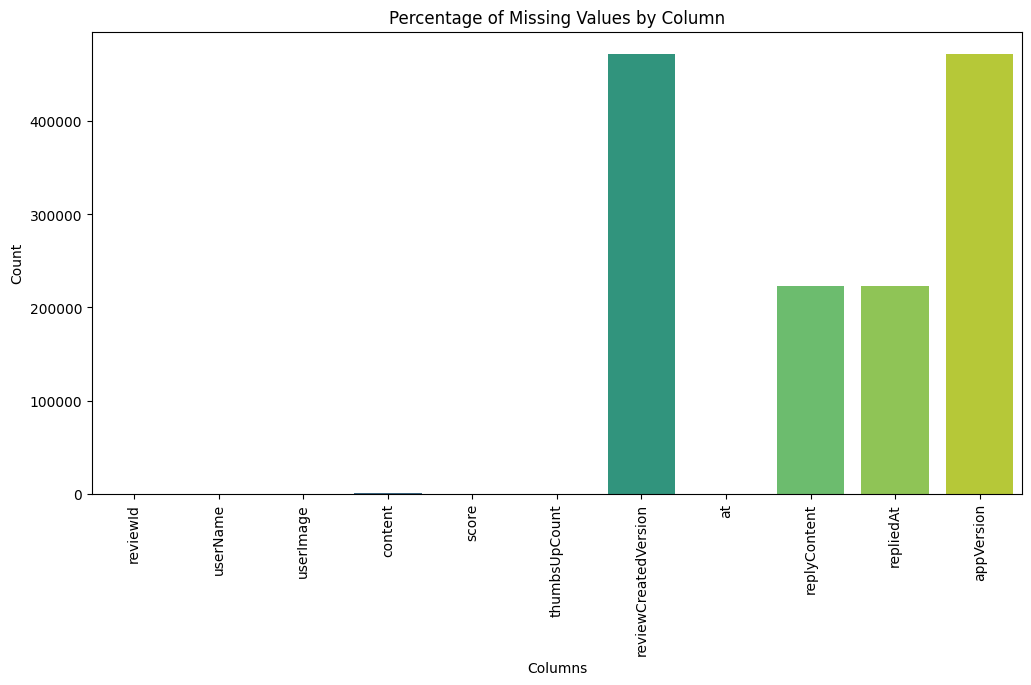

In [ ]:
import seaborn as sns
# Menghitung jumlah nilai yang hilang untuk setiap kolom
missing_values_count = app_reviews_df.isnull().sum()

# Menghitung persentase nilai yang hilang untuk setiap kolom
missing_values_percentage = app_reviews_df.isnull().mean() * 100

# Membuat DataFrame untuk menampilkan jumlah dan persentase nilai yang hilang
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Menampilkan DataFrame
print(missing_values_df)

# Menghitung persentase nilai yang hilang
missing_values_df['Missing Values Percentage'] = (missing_values_df['Missing Values Count'] / len(missing_values_df)) * 100

# Visualisasi nilai yang hilang dengan stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=missing_values_df.index, y=missing_values_df['Missing Values Percentage'], ax=ax, palette='viridis')

# Menambahkan judul dan label pada grafik
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Menampilkan grafik
plt.show()


In [ ]:
clean_df = app_reviews_df.dropna()

In [ ]:
clean_df = clean_df.drop_duplicates()
jumlah_ulasan_tanpa_duplikat, jumlah_kolom_tanpa_duplikat = clean_df.shape

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271405 entries, 0 to 343250
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              271405 non-null  object
 1   userName              271405 non-null  object
 2   userImage             271405 non-null  object
 3   content               271405 non-null  object
 4   score                 271405 non-null  int64 
 5   thumbsUpCount         271405 non-null  int64 
 6   reviewCreatedVersion  271405 non-null  object
 7   at                    271405 non-null  object
 8   replyContent          271405 non-null  object
 9   repliedAt             271405 non-null  object
 10  appVersion            271405 non-null  object
dtypes: int64(2), object(9)
memory usage: 24.8+ MB


In [ ]:
# Drop columns yang tidak diperlukan
clean_df.drop(columns=['userImage','userName','reviewCreatedVersion','repliedAt','at','replyContent', 'appVersion', 'thumbsUpCount', 'score'], inplace=True)

In [ ]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271405 entries, 0 to 343250
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   reviewId  271405 non-null  object
 1   content   271405 non-null  object
dtypes: object(2)
memory usage: 6.2+ MB


# ***Preprocessing***

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Menghapus metion (kata yang diawali @)
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # Menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # Menghapus RT (kata 'RT' diikuti spasi)
    text = re.sub(r"http\S+", '', text) # Menghapus link (berawalan 'http')
    text = re.sub(r'[0-9]+', '', text) # Menghapus numbers (0-9)
    text = re.sub(r'[^\w\s]', '', text) # Menghapus non alfabet


    text = text.replace('\n', ' ') # Mengganti newline dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # Menghapus tanda baca
    text = text.strip(' ') # Menghapus whitespace
    return text

def remove_emojis(text):
    emoji_pattern = re.compile(
        u"[\U0001F600-\U0001F64F"  # Emoticons
        u"\U0001F300-\U0001F5FF"  # Simbol & Piktograf
        u"\U0001F680-\U0001F6FF"  # Simbol Transportasi & Peta
        u"\U0001F1E0-\U0001F1FF"  # Bendera (ISO)
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251"  # Bendera (iOS)
        u"\U0001F900-\U0001F9FF"  # Ekstra simbol & piktograf
        u"\U0001FA70-\U0001FAFF"  # Simbol tambahan
        u"\U0001F000-\U0001F02F"  # Simbol domino
        u"]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

def casefoldingText(text): # Mengubah semua karakter menjadi lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenisasi
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya', 'yaa', 'gak', 'nya', 'na', 'sih', 'ku', 'di', 'ga', 'ya', 'gaa', 'loh', 'kah', 'woi', 'woii', 'woy',
        'aj', 'aja', 'alias', 'amat', 'ane', 'apaan', 'ato', 'bang', 'banget', 'barang', 'bg', 'bikin',
        'bgt', 'bolak-balik', 'bu', 'bung', 'cak', 'ck', 'cm', 'd', 'dgn', 'dll', 'dong', 'dr',
        'dsb', 'dst', 'eh', 'enggak', 'ente', 'gitu', 'gue', 'gk', 'gw', 'iya', 'jg', 'jgn',
        'kamu', 'kan', 'kau', 'kok', 'krn', 'lagi', 'lah', 'lo', 'makanya', 'malah', 'mas', 'mbak', 'mending',
        'mesti', 'mgkn', 'mo', 'mrk', 'nih', 'ntr', 'nya', 'ok', 'oke', 'pak', 'pas', 'pd',
        'sama', 'sangat', 'sbg', 'sih', 'sok', 'sy', 'tadinya', 'tidak', 'tp', 'ttp', 'tuh', 'udah', 'utk', 'yg'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Menggabungkan list kata menjadi kalimat dengan spasi
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
def fix_slangwords(text):
    slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}

    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
clean_df

,reviewId,content
0,84bef2d7-26c7-4dc0-affe-cb9ccd3290c7,"Coba untuk update nya diperbaiki lagi, yang da..."
1,fe053dfd-1043-4e64-8312-559427d86364,Setelah di update lampu indikator merah terus ...
2,ff15204c-8d21-4d40-9c6c-d8b554b0862e,Kenapa bca selalu mempersulit ketika mau memas...
3,8072118e-8406-4e04-b367-75aaba3cc960,Ribet banget. Setiap buka aplikasi selalu mint...
4,2245ece9-da95-4f11-8ce8-b31052db50aa,Sangat membantu tapi sayang tambah ribet gak k...
...,...,...
342347,acb71635-ef21-450a-9908-f2c8a09d434e,👍👍
342655,cd0af3ef-3d7e-4413-88b5-9697c0da59e7,👍👍👍👍👍
342840,3cdec230-1182-4f6c-a04e-594a887fd957,👍👍👍👍
342915,a47a34cd-f8e2-4258-8683-1195f8260321,💜💜💜💜💜


In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(remove_emojis).apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)


In [ ]:
clean_df

,reviewId,content,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,84bef2d7-26c7-4dc0-affe-cb9ccd3290c7,"Coba untuk update nya diperbaiki lagi, yang da...",Coba untuk update nya diperbaiki lagi yang dar...,coba untuk update nya diperbaiki lagi yang dar...,coba untuk update nya diperbaiki lagi yang dar...,"[coba, untuk, update, nya, diperbaiki, lagi, y...","[coba, update, diperbaiki, mudah, langsung, ma...",coba update diperbaiki mudah langsung masuk ak...
1,fe053dfd-1043-4e64-8312-559427d86364,Setelah di update lampu indikator merah terus ...,Setelah di update lampu indikator merah terus ...,setelah di update lampu indikator merah terus ...,setelah di update lampu indikator merah terus ...,"[setelah, di, update, lampu, indikator, merah,...","[update, lampu, indikator, merah, terlanjur, c...",update lampu indikator merah terlanjur cek mut...
2,ff15204c-8d21-4d40-9c6c-d8b554b0862e,Kenapa bca selalu mempersulit ketika mau memas...,Kenapa bca selalu mempersulit ketika mau memas...,kenapa bca selalu mempersulit ketika mau memas...,kenapa bca selalu mempersulit ketika mau memas...,"[kenapa, bca, selalu, mempersulit, ketika, mau...","[bca, mempersulit, memasukan, kartu, bca, samp...",bca mempersulit memasukan kartu bca sampek men...
3,8072118e-8406-4e04-b367-75aaba3cc960,Ribet banget. Setiap buka aplikasi selalu mint...,Ribet banget Setiap buka aplikasi selalu minta...,ribet banget setiap buka aplikasi selalu minta...,ribet banget setiap buka aplikasi selalu minta...,"[ribet, banget, setiap, buka, aplikasi, selalu...","[ribet, buka, aplikasi, izin, lokasi, nyalain,...",ribet buka aplikasi izin lokasi nyalain gps fu...
4,2245ece9-da95-4f11-8ce8-b31052db50aa,Sangat membantu tapi sayang tambah ribet gak k...,Sangat membantu tapi sayang tambah ribet gak k...,sangat membantu tapi sayang tambah ribet gak k...,sangat membantu tapi sayang tambah ribet gak k...,"[sangat, membantu, tapi, sayang, tambah, ribet...","[membantu, sayang, ribet, kayak, delete, inbok...",membantu sayang ribet kayak delete inbok tranf...
...,...,...,...,...,...,...,...,...
342347,acb71635-ef21-450a-9908-f2c8a09d434e,👍👍,,,,[],[],
342655,cd0af3ef-3d7e-4413-88b5-9697c0da59e7,👍👍👍👍👍,,,,[],[],
342840,3cdec230-1182-4f6c-a04e-594a887fd957,👍👍👍👍,,,,[],[],
342915,a47a34cd-f8e2-4258-8683-1195f8260321,💜💜💜💜💜,,,,[],[],


# ***Labeling***

In [ ]:
# Loads positive lexicon data from GitHub
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Loads negative lexicon data from GitHub
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [ ]:
# Function to determine sentiment polarity of tweets
# Fungsi untuk menentukan polaritas sentimen dari tweet

def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [ ]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
neutral     100293
positive     98384
negative     72728
Name: count, dtype: int64


In [ ]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Memisahkan fitur dan variabel target
X = clean_df[['text_stopword']]
y = clean_df['polarity']

# Jumlah data pada kelas mayoritas (netral)
majority_class_count = y.value_counts().max()

# Melakukan upsampling pada kelas 'positive' dan 'negative' hingga jumlahnya sama dengan kelas mayoritas
ros = RandomOverSampler(sampling_strategy={'positive': majority_class_count,
                                           'neutral': majority_class_count,
                                           'negative': majority_class_count},
                        random_state=42)
X_res, y_res = ros.fit_resample(X, y)

# Menggabungkan fitur dan variabel target yang telah di-resample kembali menjadi DataFrame
resampled_df = pd.concat([pd.DataFrame(X_res, columns=['text_stopword']), pd.DataFrame(y_res, columns=['polarity'])], axis=1)

# Menampilkan distribusi kelas baru
print('Original dataset shape:', Counter(y))
print('Resampled dataset shape:', Counter(y_res))


Original dataset shape: Counter({'neutral': 100293, 'positive': 98384, 'negative': 72728})
Resampled dataset shape: Counter({'positive': 100293, 'negative': 100293, 'neutral': 100293})


In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Pastikan kolom 'text_akhir' dan 'polarity_score' ada di DataFrame
if 'text_akhir' not in resampled_df.columns:
    resampled_df['text_akhir'] = resampled_df['text_stopword'].apply(toSentence)
if 'polarity_score' not in resampled_df.columns:
    resampled_df['polarity_score'] = resampled_df['text_stopword'].apply(lambda text: sentiment_analysis_lexicon_indonesia(text)[0])

# Membuat DataFrame baru 'positive_tweets' yang hanya berisi tweet dengan polaritas positif
positive_tweets = resampled_df[resampled_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan DataFrame 'positive_tweets' berdasarkan 'polarity_score' secara menurun
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)

# Mengatur ulang indeks DataFrame agar dimulai dari 0
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame
positive_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Pastikan kolom 'text_akhir' dan 'polarity_score' ada di DataFrame
if 'text_akhir' not in resampled_df.columns:
    resampled_df['text_akhir'] = resampled_df['text_stopword'].apply(toSentence)
if 'polarity_score' not in resampled_df.columns:
    resampled_df['polarity_score'] = resampled_df['text_stopword'].apply(lambda text: sentiment_analysis_lexicon_indonesia(text)[0])

# Membuat DataFrame baru 'negative_tweets' yang hanya berisi tweet dengan polaritas negatif
negative_tweets = resampled_df[resampled_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan DataFrame 'negative_tweets' berdasarkan 'polarity_score' secara menaik (ascending)
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan
negative_tweets = negative_tweets.head(10)

# Mengatur ulang indeks DataFrame agar dimulai dari 0
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame
negative_tweets.index += 1

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Pastikan kolom 'text_akhir' dan 'polarity_score' ada di DataFrame
if 'text_akhir' not in resampled_df.columns:
    resampled_df['text_akhir'] = resampled_df['text_stopword'].apply(toSentence)
if 'polarity_score' not in resampled_df.columns:
    resampled_df['polarity_score'] = resampled_df['text_stopword'].apply(lambda text: sentiment_analysis_lexicon_indonesia(text)[0])

# Membuat DataFrame baru 'neutral_tweets' yang hanya berisi tweet dengan polaritas netral
neutral_tweets = resampled_df[resampled_df['polarity'] == 'neutral']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'neutral_tweets'
neutral_tweets = neutral_tweets[['text_akhir', 'polarity_score', 'polarity', 'text_stopword']]

# Mengurutkan DataFrame 'neutral_tweets' berdasarkan 'polarity_score' secara menaik (ascending)
neutral_tweets = neutral_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dari DataFrame yang sudah diurutkan
neutral_tweets = neutral_tweets.head(10)

# Mengatur ulang indeks DataFrame agar dimulai dari 0
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame
neutral_tweets.index += 1


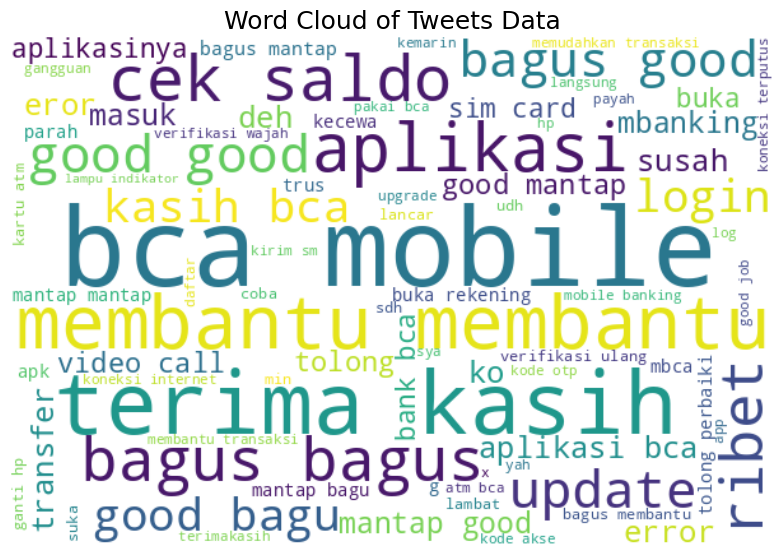

In [ ]:
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter
pd.set_option('display.max_colwidth', 3000)

# Pastikan kolom 'text_stopword' ada di DataFrame
if 'text_stopword' not in resampled_df.columns:
    raise KeyError("Kolom 'text_stopword' tidak ditemukan di DataFrame")

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'resampled_df'
for tweet in resampled_df['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + word

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

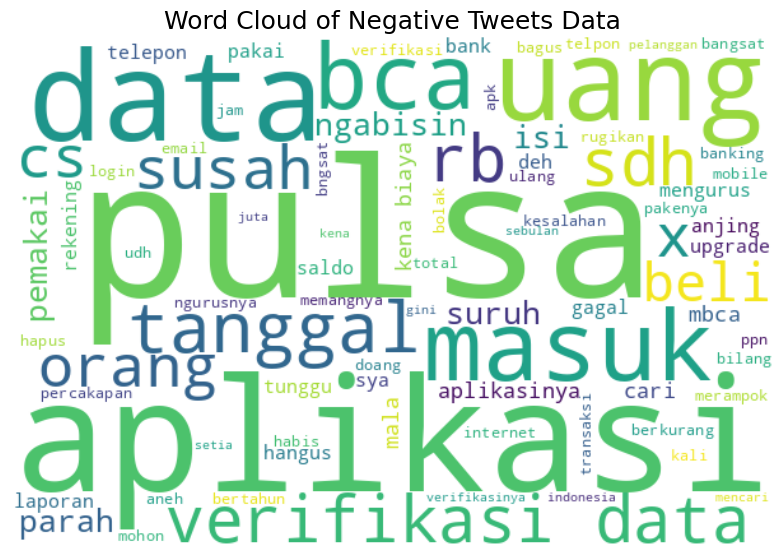

In [ ]:
# Pastikan kolom 'text_stopword' ada di DataFrame 'negative_tweets'
if 'text_stopword' not in negative_tweets.columns:
    raise KeyError("Kolom 'text_stopword' tidak ditemukan di DataFrame")

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet negatif
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'negative_tweets'
for tweet in negative_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + word

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Negative Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

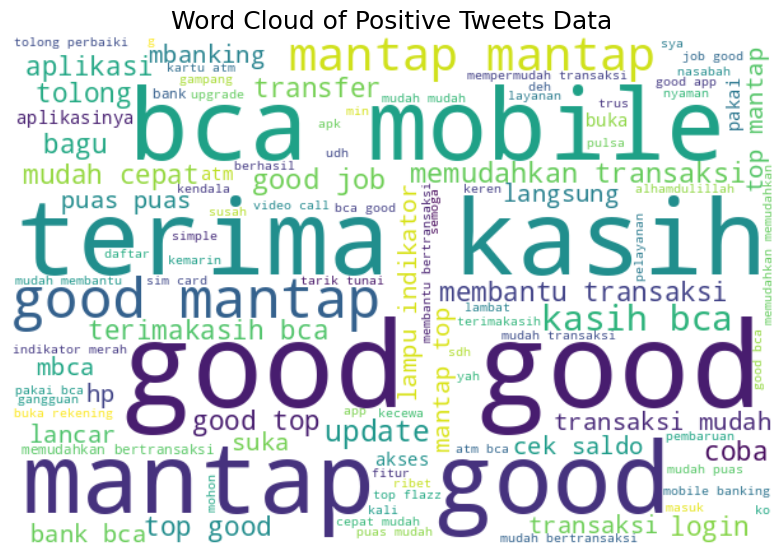

In [ ]:
# Pastikan kolom 'text_stopword' ada di DataFrame 'positive_tweets'
if 'text_stopword' not in positive_tweets.columns:
    raise KeyError("Kolom 'text_stopword' tidak ditemukan di DataFrame")

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet positif
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'positive_tweets'
for tweet in positive_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + word

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Positive Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()

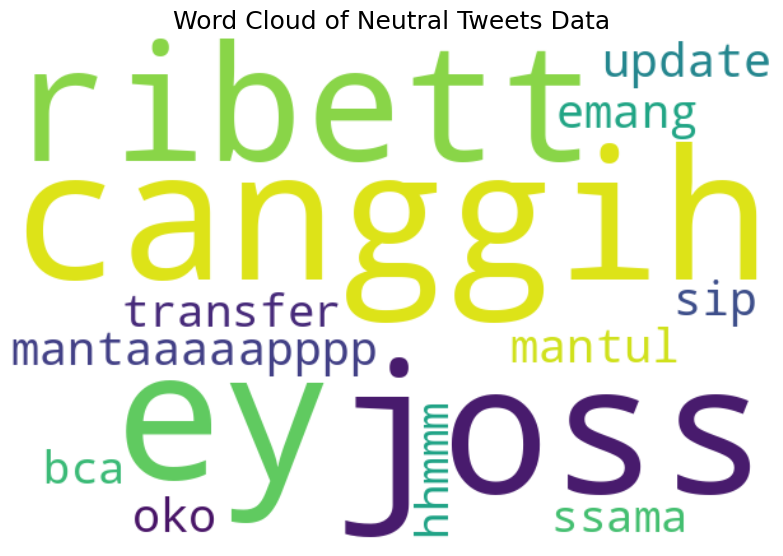

In [ ]:
# Pastikan kolom 'text_stopword' ada di DataFrame 'neutral_tweets'
if 'text_stopword' not in neutral_tweets.columns:
    raise KeyError("Kolom 'text_stopword' tidak ditemukan di DataFrame")

# Membuat string kosong 'list_words' yang akan digunakan untuk mengumpulkan semua kata dari teks yang sudah dibersihkan dalam tweet netral
list_words = ''

# Iterasi melalui setiap tweet dalam kolom 'text_stopword' dari DataFrame 'neutral_tweets'
for tweet in neutral_tweets['text_stopword']:
    # Iterasi melalui setiap kata dalam tweet
    for word in tweet:
        # Menambahkan kata ke dalam 'list_words'
        list_words += ' ' + word

# Membuat objek WordCloud dengan parameter tertentu
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

# Membuat gambar dan sumbu untuk menampilkan word cloud
fig, ax = plt.subplots(figsize=(8, 6))

# Menetapkan judul untuk word cloud
ax.set_title('Word Cloud of Neutral Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu
ax.grid(False)

# Menampilkan word cloud dalam gambar
ax.imshow(wordcloud, interpolation='bilinear')

# Mengatur layout gambar
fig.tight_layout(pad=0)

# Menyembunyikan sumbu
ax.axis('off')

# Menampilkan word cloud
plt.show()


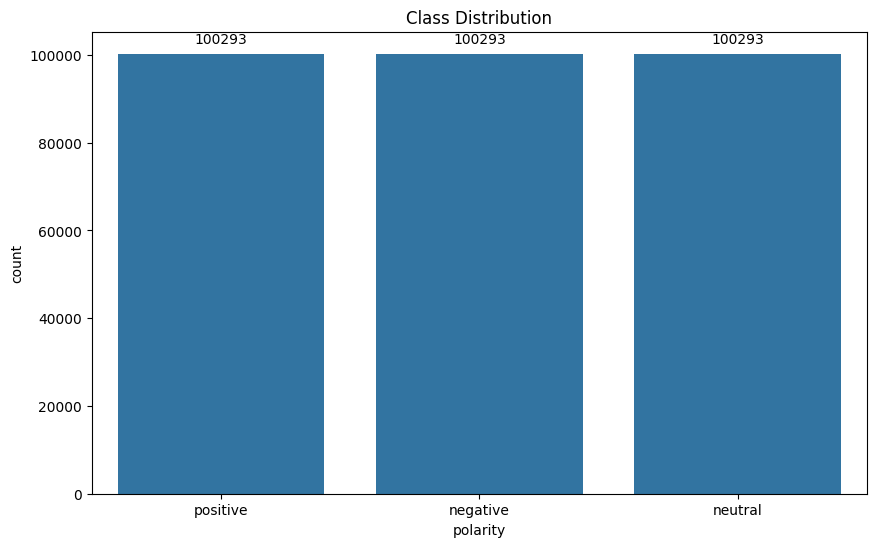

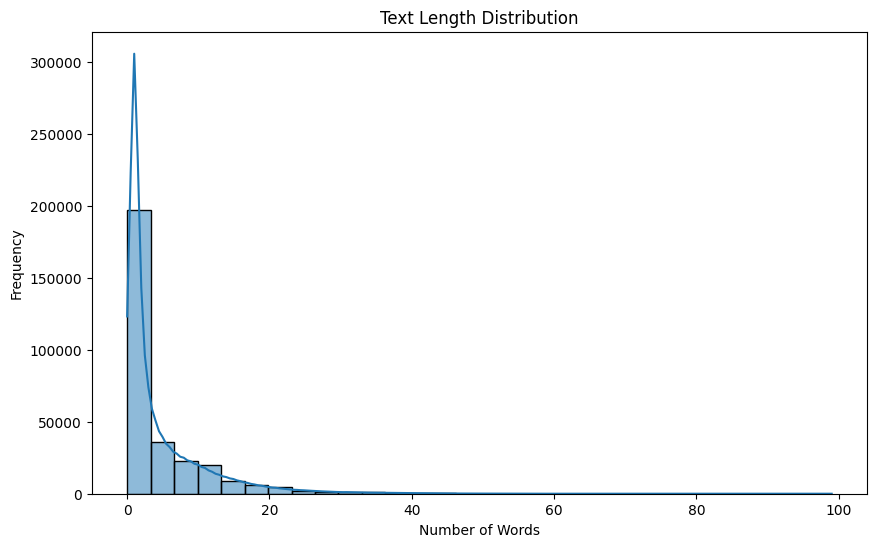

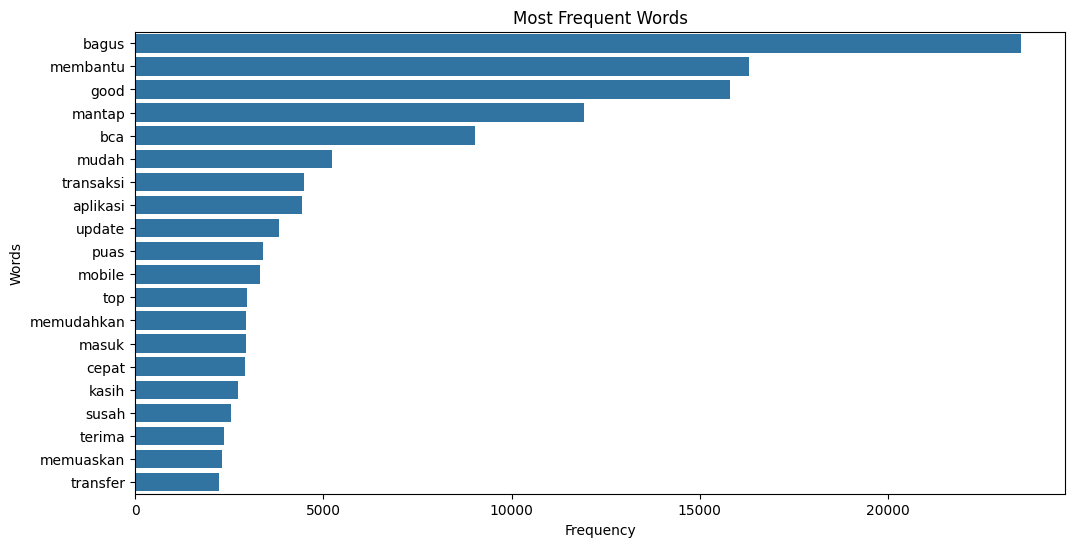

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Mengatur ukuran gambar untuk distribusi kelas
plt.figure(figsize=(10, 6))

# Memeriksa distribusi kelas
class_dist_plot = sns.countplot(x='polarity', data=resampled_df)
plt.title('Class Distribution')

# Menambahkan jumlah di atas setiap bar pada plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                             (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center',
                             xytext=(0, 10),
                             textcoords='offset points')

plt.show()

# Mengatur ukuran gambar untuk distribusi panjang teks
plt.figure(figsize=(10, 6))

# Visualisasikan distribusi panjang teks
resampled_df['text_length'] = resampled_df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(resampled_df['text_length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Mengatur ukuran gambar untuk kata-kata yang paling sering muncul
plt.figure(figsize=(12, 6))

# Visualisasikan kata-kata yang paling sering muncul menggunakan matriks sparse
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(resampled_df['text_akhir'])

# Menghitung frekuensi kata tanpa mengkonversi matriks sparse menjadi array dens
word_freq = np.asarray(X.sum(axis=0)).flatten()
tfidf_df = pd.DataFrame({'word': vectorizer.get_feature_names_out(), 'jumlah': word_freq})
tfidf_df = tfidf_df.sort_values(by='jumlah', ascending=False).head(20)

# Menggunakan seaborn untuk membuat barplot
sns.barplot(x='jumlah', y='word', data=tfidf_df)
plt.title('Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


In [ ]:
resampled_df

,text_stopword,polarity,text_akhir,polarity_score,text_length
0,"[coba, update, diperbaiki, mudah, langsung, masuk, aktifkan, lokasi, ribet, coba, ditingkatkan, pakai, fitur, biometrik, login, akun, sat, set, dipermudah, mutasi, rekening, detail, berbentuk, daftar, screen, shoot, mengirim, mutasi, mohon, dipermudah, pengguna, segi, kecanggihan, teknologi]",positive,coba update diperbaiki mudah langsung masuk aktifkan lokasi ribet coba ditingkatkan pakai fitur biometrik login akun sat set dipermudah mutasi rekening detail berbentuk daftar screen shoot mengirim mutasi mohon dipermudah pengguna segi kecanggihan teknologi,1,34
1,"[update, lampu, indikator, merah, terlanjur, cek, mutasi, sinyal, lancar, jaya, tolong, kembalikan, bca, mobile, mempermudah, nasabah, persulit, mohon, atasi, terima, kasih]",positive,update lampu indikator merah terlanjur cek mutasi sinyal lancar jaya tolong kembalikan bca mobile mempermudah nasabah persulit mohon atasi terima kasih,10,21
2,"[bca, mempersulit, memasukan, kartu, bca, sampek, menghabis, pulsa, tetep, dipersulit, masuk, dibilang, koneksi, internet, terputus, hallaaaahh, jaringan, internet, bagus², wifi, data, bisa², pengiriman, kenakan, biaya, pulsa, sampek, sekrng, kendala, gini, habis²n, duit, beli]",negative,bca mempersulit memasukan kartu bca sampek menghabis pulsa tetep dipersulit masuk dibilang koneksi internet terputus hallaaaahh jaringan internet bagus² wifi data bisa² pengiriman kenakan biaya pulsa sampek sekrng kendala gini habis²n duit beli,-21,33
3,"[ribet, buka, aplikasi, izin, lokasi, nyalain, gps, fungsinya, bilang, keamanan, kenyamanan, ribet, berteletele, g, nyalain, g, akses, trus, kalsu, lupa, matiin, gps, baterai, boncos, milih, bca, aplikasinya, point, g, bertele, skrg, akses, lokasi, pengaturannya, diizinin, otomatis, g, ngulang]",negative,ribet buka aplikasi izin lokasi nyalain gps fungsinya bilang keamanan kenyamanan ribet berteletele g nyalain g akses trus kalsu lupa matiin gps baterai boncos milih bca aplikasinya point g bertele skrg akses lokasi pengaturannya diizinin otomatis g ngulang,-14,38
4,"[membantu, sayang, ribet, kayak, delete, inbok, tranferan, adajadi, nyimpen, inbokan, bagus, persatu, hapusnyamalah, begitumalah, ribetdan, masuk, lokasi, aktifsama, rekening, salin, tekssekarang, salin, teksharusnya, diupdate, bagusgak, amburadultolong, kembalikan, ajasoalnya, terbiasa, lamayang, ribetthx]",negative,membantu sayang ribet kayak delete inbok tranferan adajadi nyimpen inbokan bagus persatu hapusnyamalah begitumalah ribetdan masuk lokasi aktifsama rekening salin tekssekarang salin teksharusnya diupdate bagusgak amburadultolong kembalikan ajasoalnya terbiasa lamayang ribetthx,-12,31
...,...,...,...,...,...
300874,"[good, job]",positive,good job,5,2
300875,[good],positive,good,5,1
300876,[nice],positive,nice,4,1
300877,"[membantu, mempermudah, transaksi]",positive,membantu mempermudah transaksi,1,3


In [ ]:
resampled_df['polarity'].value_counts()

polarity
positive    100293
negative    100293
neutral     100293
Name: count, dtype: int64

In [ ]:
# Menggunakan metode replace untuk memetakan sentimen menjadi kelas
resampled_df['tipe_sentimen'] = resampled_df['polarity'].replace(['negative', 'neutral', 'positive'], [0, 1, 2])


In [ ]:
resampled_df

,text_stopword,polarity,text_akhir,polarity_score,text_length,tipe_sentimen
0,"[coba, update, diperbaiki, mudah, langsung, masuk, aktifkan, lokasi, ribet, coba, ditingkatkan, pakai, fitur, biometrik, login, akun, sat, set, dipermudah, mutasi, rekening, detail, berbentuk, daftar, screen, shoot, mengirim, mutasi, mohon, dipermudah, pengguna, segi, kecanggihan, teknologi]",positive,coba update diperbaiki mudah langsung masuk aktifkan lokasi ribet coba ditingkatkan pakai fitur biometrik login akun sat set dipermudah mutasi rekening detail berbentuk daftar screen shoot mengirim mutasi mohon dipermudah pengguna segi kecanggihan teknologi,1,34,2
1,"[update, lampu, indikator, merah, terlanjur, cek, mutasi, sinyal, lancar, jaya, tolong, kembalikan, bca, mobile, mempermudah, nasabah, persulit, mohon, atasi, terima, kasih]",positive,update lampu indikator merah terlanjur cek mutasi sinyal lancar jaya tolong kembalikan bca mobile mempermudah nasabah persulit mohon atasi terima kasih,10,21,2
2,"[bca, mempersulit, memasukan, kartu, bca, sampek, menghabis, pulsa, tetep, dipersulit, masuk, dibilang, koneksi, internet, terputus, hallaaaahh, jaringan, internet, bagus², wifi, data, bisa², pengiriman, kenakan, biaya, pulsa, sampek, sekrng, kendala, gini, habis²n, duit, beli]",negative,bca mempersulit memasukan kartu bca sampek menghabis pulsa tetep dipersulit masuk dibilang koneksi internet terputus hallaaaahh jaringan internet bagus² wifi data bisa² pengiriman kenakan biaya pulsa sampek sekrng kendala gini habis²n duit beli,-21,33,0
3,"[ribet, buka, aplikasi, izin, lokasi, nyalain, gps, fungsinya, bilang, keamanan, kenyamanan, ribet, berteletele, g, nyalain, g, akses, trus, kalsu, lupa, matiin, gps, baterai, boncos, milih, bca, aplikasinya, point, g, bertele, skrg, akses, lokasi, pengaturannya, diizinin, otomatis, g, ngulang]",negative,ribet buka aplikasi izin lokasi nyalain gps fungsinya bilang keamanan kenyamanan ribet berteletele g nyalain g akses trus kalsu lupa matiin gps baterai boncos milih bca aplikasinya point g bertele skrg akses lokasi pengaturannya diizinin otomatis g ngulang,-14,38,0
4,"[membantu, sayang, ribet, kayak, delete, inbok, tranferan, adajadi, nyimpen, inbokan, bagus, persatu, hapusnyamalah, begitumalah, ribetdan, masuk, lokasi, aktifsama, rekening, salin, tekssekarang, salin, teksharusnya, diupdate, bagusgak, amburadultolong, kembalikan, ajasoalnya, terbiasa, lamayang, ribetthx]",negative,membantu sayang ribet kayak delete inbok tranferan adajadi nyimpen inbokan bagus persatu hapusnyamalah begitumalah ribetdan masuk lokasi aktifsama rekening salin tekssekarang salin teksharusnya diupdate bagusgak amburadultolong kembalikan ajasoalnya terbiasa lamayang ribetthx,-12,31,0
...,...,...,...,...,...,...
300874,"[good, job]",positive,good job,5,2,2
300875,[good],positive,good,5,1,2
300876,[nice],positive,nice,4,1,2
300877,"[membantu, mempermudah, transaksi]",positive,membantu mempermudah transaksi,1,3,2


# ***Split Data***

In [ ]:
# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = resampled_df['text_akhir']
y = resampled_df['tipe_sentimen']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import random

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = resampled_df['text_akhir']
y = resampled_df['tipe_sentimen']

# Split data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def random_swap(text, n_swaps=1):
    words = text.split()
    length = len(words)
    if length < 2:
        return text

    for _ in range(n_swaps):
        idx1, idx2 = random.sample(range(length), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]

    return ' '.join(words)

# Terapkan augmentasi ke data latih
X_train_augmented = X_train.apply(lambda x: random_swap(x, n_swaps=2))

# Gabungkan data asli dan data augmentasi
X_train_combined = pd.concat([X_train, X_train_augmented])
y_train_combined = pd.concat([y_train, y_train])

# Hasil gabungan
print(X_train_combined.head())
print(y_train_combined.head())


210884                        top
170061                           
245580                     mantap
238642    gagal peripikasi simcad
110985                           
Name: text_akhir, dtype: object
210884    2
170061    1
245580    2
238642    0
110985    1
Name: tipe_sentimen, dtype: int64


# ***Feature Extraction***

## ***TF-IDF***

In [ ]:
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_train_tfidf = tfidf.fit_transform(X_train_combined)
X_test_tfidf = tfidf.fit_transform(X_test)

In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
X_train_tfidf_features_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
X_train_tfidf_features_df

,admin,akses,aktivasi,aman,aneh,apk,aplikasi,aplikasinya,app,atm,...,unable,update,upgrade,verifikasi,versi,via,video,wajah,wifi,yah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481403,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
481404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_tfidf_features_df.describe()

,admin,akses,aktivasi,aman,aneh,apk,aplikasi,aplikasinya,app,atm,...,unable,update,upgrade,verifikasi,versi,via,video,wajah,wifi,yah
count,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,...,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000,481406.000000
mean,0.002334,0.004103,0.001910,0.004494,0.001806,0.004081,0.024136,0.005485,0.003971,0.010925,...,0.001895,0.020638,0.003004,0.010310,0.003589,0.001822,0.002788,0.003433,0.002432,0.002551
std,0.033366,0.046534,0.031132,0.055145,0.030880,0.049001,0.109192,0.055997,0.050685,0.070204,...,0.033991,0.112222,0.043426,0.067238,0.044861,0.028792,0.037604,0.042680,0.030913,0.037454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Konversi hasil ekstraksi fitur menjadi dataframe
X_test_tfidf_features_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
X_test_tfidf_features_df

,admin,akses,aktivasi,aman,aneh,apk,aplikasi,aplikasinya,app,atm,...,unable,update,upgrade,verifikasi,versi,via,video,wajah,wifi,yah
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_test_tfidf_features_df.describe()

,admin,akses,aktivasi,aman,aneh,apk,aplikasi,aplikasinya,app,atm,...,unable,update,upgrade,verifikasi,versi,via,video,wajah,wifi,yah
count,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,...,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000,60176.000000
mean,0.002377,0.004126,0.001649,0.004551,0.001786,0.003981,0.023873,0.005325,0.003909,0.010664,...,0.001818,0.020320,0.002727,0.010471,0.003833,0.001685,0.002754,0.003160,0.002697,0.002367
std,0.035079,0.046217,0.029120,0.056313,0.030622,0.048186,0.110680,0.055057,0.050524,0.069242,...,0.032711,0.111689,0.041815,0.067874,0.047037,0.027493,0.037113,0.040903,0.032492,0.036461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.906202,1.000000,1.000000,1.000000,1.000000


## ***Word Embedding***

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

In [ ]:
def tokenize(text):
    return text.split()

X_train_tokenized = X_train_combined.apply(tokenize)
X_test_tokenized = X_test.apply(tokenize)

# Latih model Word2Vec pada data latih
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=200, window=5, min_count=1, workers=4)

# Fungsi untuk mengubah teks menjadi vektor
def text_to_vector(tokens, model):
    vec = np.zeros(model.vector_size)
    count = 0
    for word in tokens:
        if word in model.wv:
            vec += model.wv[word]
            count += 1
    if count != 0:
        vec /= count
    return vec

# Konversi data latih dan data uji menjadi vektor
X_train_vec = np.array([text_to_vector(tokens, word2vec_model) for tokens in X_train_tokenized])
X_test_vec = np.array([text_to_vector(tokens, word2vec_model) for tokens in X_test_tokenized])

In [ ]:
feature_names = word2vec_model.wv.index_to_key[:X_train_vec.shape[1]]
features_train_df = pd.DataFrame(X_train_vec, columns=feature_names)
features_test_df = pd.DataFrame(X_test_vec, columns=feature_names)

In [ ]:
# Menampilkan hasil ekstraksi fitur untuk data latih (opsional)
features_train_df

,bca,bagus,membantu,aplikasi,good,transaksi,update,mobile,mantap,masuk,...,terbaru,mbangking,sip,telepon,ny,ktp,kepotong,doang,unable,si
0,-0.529294,-0.874968,1.471084,0.043902,1.335611,0.091494,0.021824,1.736186,2.167037,1.182826,...,0.846413,-0.553750,-0.649118,-2.560051,-0.035644,0.357499,1.239155,0.094228,-0.241636,-0.395123
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,-0.236526,-0.257048,0.265832,-1.020396,0.894746,-1.213605,-0.010263,1.152025,-0.200167,0.121067,...,0.915047,-0.085956,-0.391592,-1.298006,-0.072840,1.269267,0.527141,-0.311972,0.233121,0.398475
3,-0.000243,0.027985,-0.255240,0.427164,0.296570,0.180193,-0.152850,0.251959,0.218191,-0.107392,...,0.052211,-0.959265,0.465771,0.207968,0.319141,-0.275053,0.229045,0.367671,-0.635014,-0.059713
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481401,-0.253008,0.804333,-0.224423,-0.596464,1.157826,-1.712278,-0.015604,0.709609,0.314665,0.460923,...,1.766122,-0.049400,-0.840266,-0.606839,-0.678382,1.084004,0.860960,-1.090058,0.575470,-0.134897
481402,-0.132082,-0.030989,-0.012684,0.070015,0.726506,-1.403192,0.288677,0.757090,0.141531,-0.086472,...,0.725626,0.192368,-0.513846,-0.705605,0.080155,0.477917,0.172133,-1.230209,0.646272,0.076614
481403,0.095345,0.049881,0.285251,0.319966,0.100071,-0.084230,0.242552,-0.323604,-0.072184,0.658947,...,0.537209,0.146993,0.518747,0.256405,0.227786,-0.688466,-0.505500,-0.216569,-0.394032,-0.298185
481404,0.003720,0.631879,-0.168666,0.301926,1.047182,-0.437777,-0.794577,0.329017,-0.217783,0.578680,...,0.138635,-0.190313,-0.272952,0.990024,1.094316,0.742280,0.796565,-0.249298,-0.560024,0.369907


In [ ]:
# Menampilkan hasil ekstraksi fitur untuk data uji (opsional)
features_test_df

,bca,bagus,membantu,aplikasi,good,transaksi,update,mobile,mantap,masuk,...,terbaru,mbangking,sip,telepon,ny,ktp,kepotong,doang,unable,si
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.506518,-0.052970,-0.516245,0.652559,0.309875,-0.059086,-0.142600,1.156059,-0.903067,0.804757,...,-0.590406,0.081419,0.375515,-0.562835,-0.619527,0.457414,-0.485725,1.062004,-0.326206,-0.236983
2,-0.149357,-0.270544,0.346036,0.186506,0.410026,-0.152443,0.040170,0.823991,0.289777,0.377893,...,0.631052,-0.186712,-0.342087,-0.791869,-0.092571,0.101203,0.406227,0.083572,-0.092471,0.284116
3,-0.633929,0.407455,0.156241,0.422379,1.183630,-1.486404,0.456066,0.757588,0.038956,0.339995,...,0.681757,0.517673,-0.541183,-0.559691,0.351633,0.355629,0.130236,-1.007329,0.864556,0.285531
4,0.419233,0.023074,0.014462,0.702478,0.375896,0.105488,-0.156985,0.169401,-0.298312,0.286851,...,-0.507815,-0.277802,0.381344,-0.069648,-0.223622,-0.348249,-0.058727,-0.165500,-0.433829,-0.136044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60171,-0.571836,-0.461558,-0.173258,-0.245270,1.264406,-0.586055,0.003796,1.375535,0.594755,1.199870,...,1.414255,0.412863,-0.831444,-1.044209,-0.479716,1.508399,-0.788709,-0.263935,0.271828,-0.102245
60172,-0.090381,-0.326493,0.178695,-0.514772,0.348631,-0.810406,0.256520,1.172979,-0.139144,0.310257,...,0.769312,0.006309,-0.364622,-1.244907,0.070407,0.681703,0.694195,-0.370671,0.108208,0.497377
60173,0.003720,0.631879,-0.168666,0.301926,1.047182,-0.437777,-0.794577,0.329017,-0.217783,0.578680,...,0.138635,-0.190313,-0.272952,0.990024,1.094316,0.742280,0.796565,-0.249298,-0.560024,0.369907
60174,0.551280,0.244392,-0.043760,1.150629,0.334520,-0.002159,-0.287882,0.247593,0.121332,0.989145,...,0.439883,0.206195,0.167363,-0.431809,-0.294158,0.594778,-0.139711,0.747463,-0.167964,-0.344737


# ***Modeling***

## ***Data Word2Vec***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

# Membuat model Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train_combined)

# Prediksi pada data latih dan data uji
y_pred_train_lr = logistic_regression.predict(X_train_scaled)
y_pred_test_lr = logistic_regression.predict(X_test_scaled)

# Evaluasi akurasi model Logistic Regression pada data latih
accuracy_train_lr = accuracy_score(y_train_combined, y_pred_train_lr)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

# Menampilkan akurasi
print(f'Logistic Regression - accuracy_train: {accuracy_train_lr}')
print(f'Logistic Regression - accuracy_test: {accuracy_test_lr}')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.8786346659576324
Logistic Regression - accuracy_test: 0.8784066737569796


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()

# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train_vec, y_train_combined)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train_vec)
y_pred_test_dt = decision_tree.predict(X_test_vec)

# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train_combined)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 1.0
Decision Tree - accuracy_test: 0.8807830364264824


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train_combined)
y_pred_train_rf = rf_model.predict(X_train_vec)
y_pred_test_rf = rf_model.predict(X_test_vec)

accuracy_train_rf = accuracy_score(y_train_combined, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f'Random Forest - accuracy_train: {accuracy_train_rf}')
print(f'Random Forest - accuracy_test: {accuracy_test_rf}')


Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.9175086413187982


In [ ]:
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled = scaler.transform(X_test_vec)

# Membuat model XGBClassifier
gbm_model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=3, random_state=42)

# Melatih model pada data pelatihan
gbm_model.fit(X_train_scaled, y_train_combined)

# Prediksi pada data latih dan data uji
y_pred_train_gbm = gbm_model.predict(X_train_scaled)
y_pred_test_gbm = gbm_model.predict(X_test_scaled)

# Evaluasi akurasi model pada data latih
accuracy_train_gbm = accuracy_score(y_train_combined, y_pred_train_gbm)

# Evaluasi akurasi model pada data uji
accuracy_test_gbm = accuracy_score(y_test, y_pred_test_gbm)

# Menampilkan akurasi
print(f'GBM - accuracy_train: {accuracy_train_gbm}')
print(f'GBM - accuracy_test: {accuracy_test_gbm}')


GBM - accuracy_train: 0.8886096143380016
GBM - accuracy_test: 0.8851369316671098


In [ ]:
# Membuat DataFrame untuk hasil akurasi
results_df = pd.DataFrame({
    'Model': ['GBM', 'Random Forest', 'Logistic Regression', 'Decision Tree'],
    'Accuracy Train': [accuracy_train_gbm, accuracy_train_rf, accuracy_train_lr, accuracy_train_dt],
    'Accuracy Test': [accuracy_test_gbm, accuracy_test_rf, accuracy_test_lr, accuracy_test_dt]
})
# Menampilkan hanya kolom "Accuracy Test"
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0                  GBM       0.885137
1        Random Forest       0.917509
2  Logistic Regression       0.878407
3        Decision Tree       0.880783


In [ ]:
# Input kalimat baru dari pengguna
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = caseFoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Mengubah kalimat baru menjadi vektor menggunakan Word2Vec
def get_feature_vector(review, model):
    words = review.split()
    feature_vector = np.mean([model.wv[word] for word in words if word in model.wv], axis=0)
    if np.isnan(feature_vector).any():
        feature_vector = np.zeros(model.vector_size)
    return feature_vector

X_kalimat_baru = np.array([get_feature_vector(kalimat_baru_final, word2vec_model)])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = rf_model.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 2:
    print("Sentimen kalimat baru adalah POSITIF.")
elif prediksi_sentimen[0] == 1:
    print("Sentimen kalimat baru adalah NETRAL.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")


Masukkan kalimat baru: mantap
Sentimen kalimat baru adalah POSITIF.


## ***Data TF-IDF***

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
# Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_tfidf_features_df)
X_test_scaled = scaler.transform(X_test_tfidf_features_df)

# Hyperparameter tuning dengan GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train_combined)

print(f'Best parameters for Logistic Regression: {grid_search_lr.best_params_}')
print(f'Best cross-validation score for Logistic Regression: {grid_search_lr.best_score_}')

# Evaluasi model dengan K-Fold cross-validation
logistic_regression_cv = LogisticRegression(**grid_search_lr.best_params_, max_iter=2000, random_state=42)
cv_scores_lr = cross_val_score(logistic_regression_cv, X_train_scaled, y_train_combined, cv=5)
print(f'Mean cross-validation score for Logistic Regression: {cv_scores_lr.mean()}')


In [ ]:
# Hyperparameter tuning dengan GridSearchCV
param_grid_dt = {
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_search_dt.fit(X_train_scaled, y_train_combined)

print(f'Best parameters for Decision Tree: {grid_search_dt.best_params_}')
print(f'Best cross-validation score for Decision Tree: {grid_search_dt.best_score_}')

# Evaluasi model dengan K-Fold cross-validation
decision_tree_cv = DecisionTreeClassifier(**grid_search_dt.best_params_, random_state=42)
cv_scores_dt = cross_val_score(decision_tree_cv, X_train_scaled, y_train_combined, cv=5)
print(f'Mean cross-validation score for Decision Tree: {cv_scores_dt.mean()}')


Logistic Regression CV - accuracy_train: 0.9084888846420692
Logistic Regression CV - accuracy_test: 0.6122540547726668
Cross-validation scores: [0.90818637 0.90901632 0.90679366 0.90946293 0.90786344]
Mean cross-validation score: 0.9082645419420878


In [ ]:
# Hyperparameter tuning dengan GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_scaled, y_train_combined)

print(f'Best parameters for Random Forest: {grid_search_rf.best_params_}')
print(f'Best cross-validation score for Random Forest: {grid_search_rf.best_score_}')

# Evaluasi model dengan K-Fold cross-validation
random_forest_cv = RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)
cv_scores_rf = cross_val_score(random_forest_cv, X_train_scaled, y_train_combined, cv=5)
print(f'Mean cross-validation score for Random Forest: {cv_scores_rf.mean()}')


In [ ]:
# Hyperparameter tuning dengan GridSearchCV
param_grid_gbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_gbm = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbm, cv=5)
grid_search_gbm.fit(X_train_scaled, y_train_combined)

print(f'Best parameters for GBM: {grid_search_gbm.best_params_}')
print(f'Best cross-validation score for GBM: {grid_search_gbm.best_score_}')

# Evaluasi model dengan K-Fold cross-validation
gbm_cv = GradientBoostingClassifier(**grid_search_gbm.best_params_, random_state=42)
cv_scores_gbm = cross_val_score(gbm_cv, X_train_scaled, y_train_combined, cv=5)
print(f'Mean cross-validation score for GBM: {cv_scores_gbm.mean()}')